## ABC applied to position reconstruction

*Bart Pelssers, 26-02-2018, most recent update 20-04-2018*

This notebook provides some ingredients for applying the ABC algorithm to position reconstruction, the most basic case. Just to test the framework.


* Provides:
  * prior mean
  * forward model
  * summary statistic

In [1]:
import numpy as np

In [2]:
from abc_reconstruction.simpleModel import SimpleModel
from abc_reconstruction.utils import PriorPosition, Generator

You don't have ROOT or root_pandas, root truth file output is disabled


In [3]:
# Setup the Models
model = SimpleModel()
prior_mean = PriorPosition()
generator = Generator(model)

In [5]:
# Example pattern from some unknown x,y position
generator()

array([  0.50863945,   0.33705895,   0.44937516,   0.27095042,
         0.35889195,   0.24580363,   0.34503317,   0.21881566,
         0.28677499,   0.2104232 ,   0.17881596,   0.19869443,
         0.18830608,   0.17468941,   0.27832288,   0.23707473,
         0.17110782,   0.34965276,   0.22858973,   0.28226425,
         0.23898326,   0.36621281,   0.38868638,   0.43661718,
         0.44051818,   0.64196656,   0.6805659 ,   0.87625738,
         0.99840489,   1.16357807,   1.2219402 ,   1.31818801,
         1.18425173,   1.0320139 ,   0.809354  ,   0.66120235,
         0.9444326 ,   0.81723391,   0.66141362,   0.58945844,
         0.61726607,   0.58199702,   0.46650015,   0.51376411,
         0.43879956,   0.48190923,   0.45018597,   0.40987082,
         0.56905908,   0.56335092,   0.496536  ,   0.67062304,
         0.56454325,   0.6724137 ,   0.6884499 ,   0.75842087,
         0.8844224 ,   0.86587258,   1.18396362,   1.74347765,
         1.96104393,   2.13421288,   1.92770339,   1.72

In [6]:
# Example pattern from x=24, y=-12

# The range of x and y is [-47.884375 cm, -47.884375 cm]
# But x**2 + y**2 < 47.884375**2
# Otherwise model() will raise and exception

pattern = model(24, -12)

print("Length of pattern: %d, Sum of pattern: %.2f" % (len(pattern), pattern.sum()))
print(pattern)

Length of pattern: 127, Sum of pattern: 500.00
[ 0.15557719  0.19895666  0.24922448  0.2724799   0.27603412  0.32449659
  0.46050632  0.42301344  0.70506899  1.03060055  1.49578963  2.37547693
  3.52593554  3.95085483  3.86295943  2.53731881  1.74439776  1.23509644
  0.79510001  0.55862571  0.38564723  0.36349537  0.26005279  0.29975047
  0.26727978  0.20429186  0.16533915  0.18444405  0.20685526  0.18781974
  0.12732736  0.19919409  0.17400086  0.21413046  0.2363081   0.19032239
  0.42978286  0.45080137  0.43135062  0.62552338  0.71541464  0.90842272
  1.01409495  1.32520928  2.25855376  4.58073379  9.29216553 13.23124765
  9.35138085  4.50353515  2.12894642  1.33947176  0.96438981  0.7805329
  0.65992508  0.72478981  0.60333853  0.64092246  0.43065135  0.4776672
  0.42722602  0.47022137  0.48347138  0.42317722  0.46218003  0.41164114
  0.5434028   0.62935448  0.57891689  0.73046393  1.00482359  1.44051276
  2.82032086  9.48582028 42.77481076 73.98752745 22.15800888  4.55795975
  2.00

In [7]:
# If using a 2D Normal prior this would be a good guess for the mean (x,y) of that prior.
prior_mean(pattern)

(19.536776256292445, -13.679798006972462)

# Generate hitpatterns

Update 22-03-2018

Generate hitpatterns from true x,y position to reconstruct with Pax and compare to ABC method

In [34]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
# Read true positions list
filename = 'truepos'  # Text file with x_y per row

true_pos = pd.read_csv(filename, header=None, names=['x_true', 'y_true'], sep=' ')

In [36]:
true_pos.head()

,x_true,y_true
0,2.626434,-17.960824
1,10.907536,-6.312277
2,2.726006,37.749081
3,-21.259064,-4.445240
4,-18.078293,-23.212466


In [37]:
# Add the hitpatterns based on the simple model
def add_pattern(row):
    row['pattern'] = model(row['x_true'], row['y_true'])
    return row

In [38]:
true_pos = true_pos.apply(add_pattern, axis=1)

In [39]:
true_pos.head()

,x_true,y_true,pattern
0,2.626434,-17.960824,"[0.14841595200891483, 0.14397197856567667, 0.1..."
1,10.907536,-6.312277,"[0.2772208672784861, 0.18600688250547348, 0.21..."
2,2.726006,37.749081,"[7.066845982206454, 19.236392492314472, 30.553..."
3,-21.259064,-4.445240,"[0.22450618881550075, 0.2793734178937784, 0.19..."
4,-18.078293,-23.212466,"[0.1974036643923429, 0.16818957719006675, 0.11..."


In [40]:
# Store patterns for reconstruction
np.savez('data/simple_lce_model_patterns', hitpattern = true_pos['pattern'].values)

In [41]:
# Load reconstructed patterns
reconstructed = np.load("data/simple_lce_model_patterns_rec.npz")
#reconstructed_zoom = np.load("data/simple_lce_model_patterns_rec_zoom10.npz")
reconstructed_zoom = np.load("data/simple_lce_model_patterns_rec_zoom10_zoom10gen.npz")

In [42]:
true_pos['x_rec'] = reconstructed['x_tpf_qe']
true_pos['y_rec'] = reconstructed['y_tpf_qe']
true_pos['x_rec_nn'] = reconstructed['x_nn_qe']
true_pos['y_rec_nn'] = reconstructed['y_nn_qe']

true_pos['x_rec_zoom'] = reconstructed_zoom['x_tpf_qe']
true_pos['y_rec_zoom'] = reconstructed_zoom['y_tpf_qe']

In [43]:
true_pos['d_tpf'] = np.sqrt((true_pos['x_true'] - true_pos['x_rec'])**2 + (true_pos['y_true'] - true_pos['y_rec'])**2)
true_pos['d_tpf_zoom'] = np.sqrt((true_pos['x_true'] - true_pos['x_rec_zoom'])**2 + (true_pos['y_true'] - true_pos['y_rec_zoom'])**2)
true_pos['d_nn'] = np.sqrt((true_pos['x_true'] - true_pos['x_rec_nn'])**2 + (true_pos['y_true'] - true_pos['y_rec_nn'])**2)

In [44]:
true_pos.head()

,x_true,y_true,pattern,x_rec,y_rec,x_rec_nn,y_rec_nn,x_rec_zoom,y_rec_zoom,d_tpf,d_tpf_zoom,d_nn
0,2.626434,-17.960824,"[0.14841595200891483, 0.14397197856567667, 0.1...",2.520230,-17.881634,2.535508,-18.200328,2.613182,-17.943847,0.132478,0.021537,0.256184
1,10.907536,-6.312277,"[0.2772208672784861, 0.18600688250547348, 0.21...",10.920998,-6.360581,11.275090,-6.346362,10.925588,-6.296523,0.050145,0.023959,0.369130
2,2.726006,37.749081,"[7.066845982206454, 19.236392492314472, 30.553...",2.760252,37.803454,3.125084,37.720948,2.712731,37.754252,0.064259,0.014246,0.400069
3,-21.259064,-4.445240,"[0.22450618881550075, 0.2793734178937784, 0.19...",-21.241941,-4.440406,-21.017482,-3.832932,-21.278764,-4.454852,0.017792,0.021921,0.658242
4,-18.078293,-23.212466,"[0.1974036643923429, 0.16818957719006675, 0.11...",-18.121656,-23.162116,-17.869011,-22.379250,-18.093172,-23.219985,0.066449,0.016671,0.859097


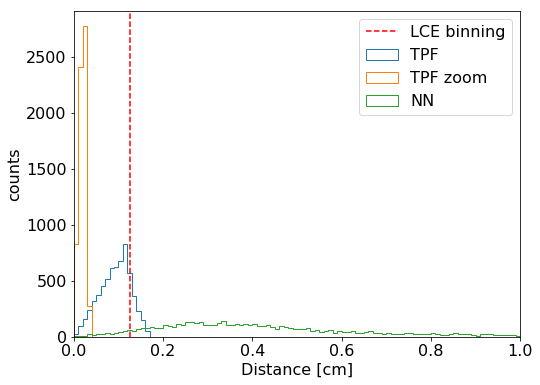

In [45]:
# Check if postions make sense
plt.rcParams['font.size'] = 16
d_range = 1
plt.figure(figsize=(8,6))
plt.hist(true_pos['d_tpf'], bins=100, range=(0, d_range), histtype='step', label='TPF')
plt.hist(true_pos['d_tpf_zoom'], bins=100, range=(0, d_range), histtype='step', label='TPF zoom')
plt.hist(true_pos['d_nn'], bins=100, range=(0, d_range), histtype='step', label='NN')
plt.axvline(1/8, color='red', linestyle='--', label='LCE binning')
plt.xlim(0, d_range)
plt.xlabel('Distance [cm]')
plt.ylabel('counts')
plt.legend()
#plt.savefig('d_tpf_nn_simple.png', dpi=150)
plt.show()

In [46]:
# Save the positions (drop the patterns since these take up a lot of space)
true_pos.drop('pattern', inplace=True, axis=1)

true_pos.to_hdf('data/reconstructed_postions_simple.hdf', key='pos')

In [47]:
# How to load this back into python
data = pd.read_hdf('data/reconstructed_postions_simple.hdf', key='pos')

In [48]:
data.head()

,x_true,y_true,x_rec,y_rec,x_rec_nn,y_rec_nn,x_rec_zoom,y_rec_zoom,d_tpf,d_tpf_zoom,d_nn
0,2.626434,-17.960824,2.520230,-17.881634,2.535508,-18.200328,2.613182,-17.943847,0.132478,0.021537,0.256184
1,10.907536,-6.312277,10.920998,-6.360581,11.275090,-6.346362,10.925588,-6.296523,0.050145,0.023959,0.369130
2,2.726006,37.749081,2.760252,37.803454,3.125084,37.720948,2.712731,37.754252,0.064259,0.014246,0.400069
3,-21.259064,-4.445240,-21.241941,-4.440406,-21.017482,-3.832932,-21.278764,-4.454852,0.017792,0.021921,0.658242
4,-18.078293,-23.212466,-18.121656,-23.162116,-17.869011,-22.379250,-18.093172,-23.219985,0.066449,0.016671,0.859097
